In [1]:
from astropy.cosmology import Planck13
from prospectFunctions import *
import numpy as np
import itertools

In [2]:
data_grid_params = np.load('params.npy')
data_grid_spec = np.load('specs.npy')
data_grid_phot = np.load('phots.npy')

grid_ranges = {}
grid_ranges['logzsol'] = np.linspace(-1,.5,10)
grid_ranges['dust2'] = np.linspace(0,3,10)
grid_ranges['tage'] = np.linspace(7,9,10)

logzs = grid_ranges['logzsol']
dusts = grid_ranges['dust2']
tages = grid_ranges['tage']

run_params = {}
run_params['zred'] = 3.548
run_params['mass'] = 1e8
run_params['add_duste'] = False
run_params['zcontinuous'] = 1

a = 1.0 + run_params['zred']

obs = getObs(**run_params)
sps = getSps(**run_params)
wspec, wphot = getWave(obs=obs,sps=sps,**run_params)

In [3]:
# VERSION OF CALCULATING BALMER BREAK ANNA USED

bounds = getBreakBounds(wspec, **run_params)
blue_lower, blue_upper = bounds['blue'][0], bounds['blue'][1]
red_lower, red_upper = bounds['red'][0], bounds['red'][1]

data_grid_break = np.empty((len(logzs),len(dusts),len(tages),1))

for i_logz,i_dust,i_tage in itertools.product(range(len(logzs)),range(len(dusts)),range(len(tages))):
    lower = data_grid_spec[i_logz,i_dust,i_tage,blue_lower:blue_upper].mean()
    upper = data_grid_spec[i_logz,i_dust,i_tage,red_lower:red_upper].mean()

    ratio = upper/lower

    data_grid_break[i_logz,i_dust,i_tage,:] = ratio

In [4]:
blue_lower

382

In [5]:
# VERSION OF CALCULATING BALMER BREAK D4000 USED

bounds = getBreakBoundsD4000(wspec, **run_params)
blue_lower, blue_upper = bounds['blue'][0], bounds['blue'][1]
red_lower, red_upper = bounds['red'][0], bounds['red'][1]

data_grid_break_D4000 = np.empty((len(logzs),len(dusts),len(tages),1))

for i_logz,i_dust,i_tage in itertools.product(range(len(logzs)),range(len(dusts)),range(len(tages))):
    lower = data_grid_spec[i_logz,i_dust,i_tage,blue_lower:blue_upper].mean()
    upper = data_grid_spec[i_logz,i_dust,i_tage,red_lower:red_upper].mean()

    ratio = upper/lower

    data_grid_break_D4000[i_logz,i_dust,i_tage,:] = ratio

In [6]:
red_upper

914

# Plotting the cross-sections of parameter space for break strength

Using the blue and red contiuum's for D4000 as in Table 1 of Balogh, 1999:

* blue continuum = [3850-3950]
* red continuum = [4000-4100]

In [7]:
# Want to plot the 1D spectra for these ^^

# order of parameters [zred,mass,logz,dust,tage]

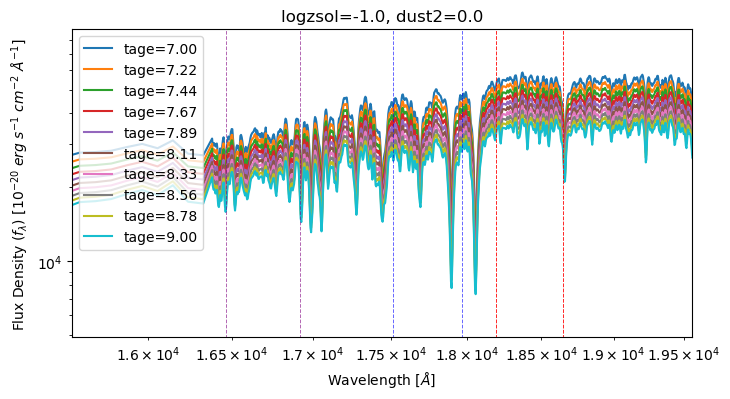

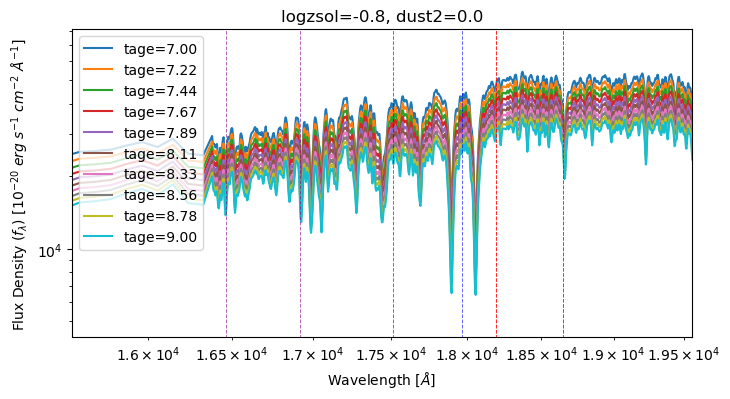

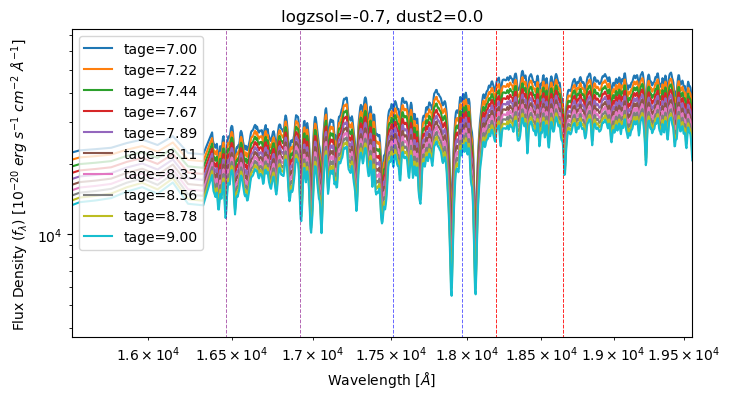

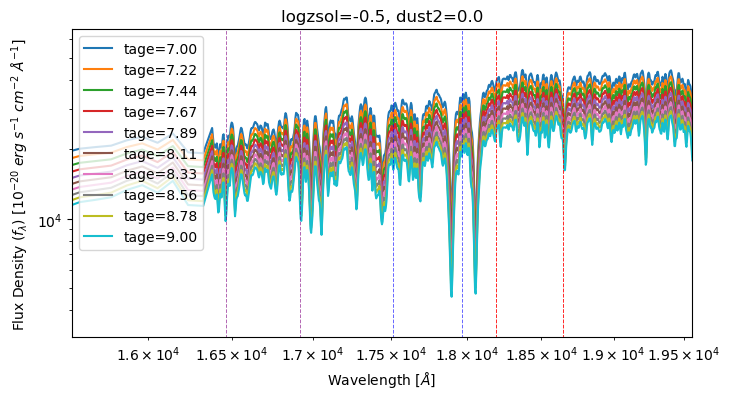

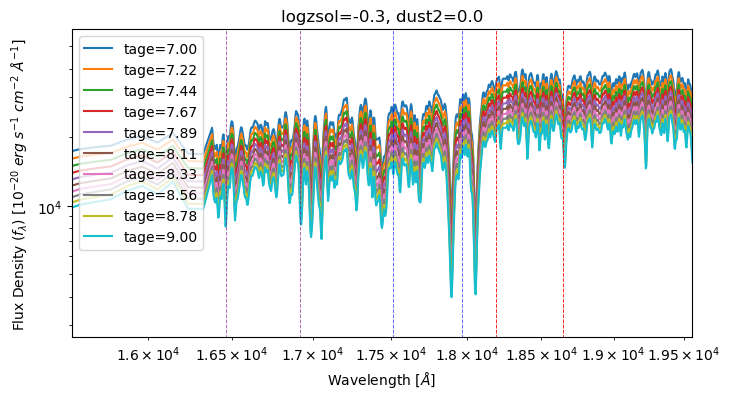

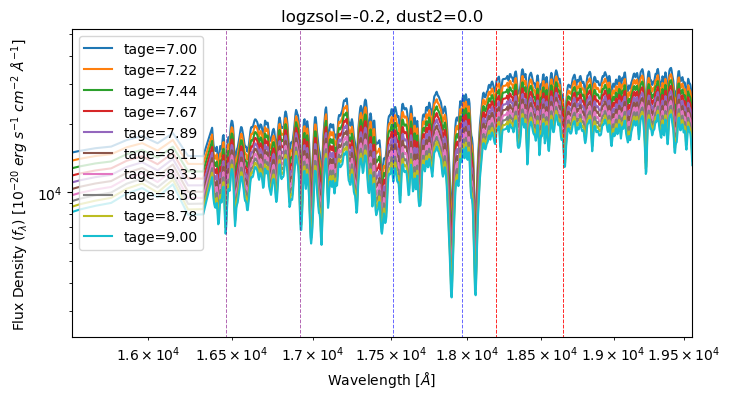

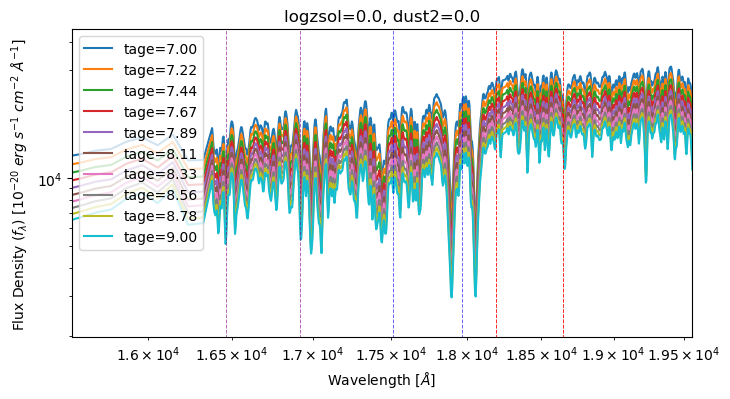

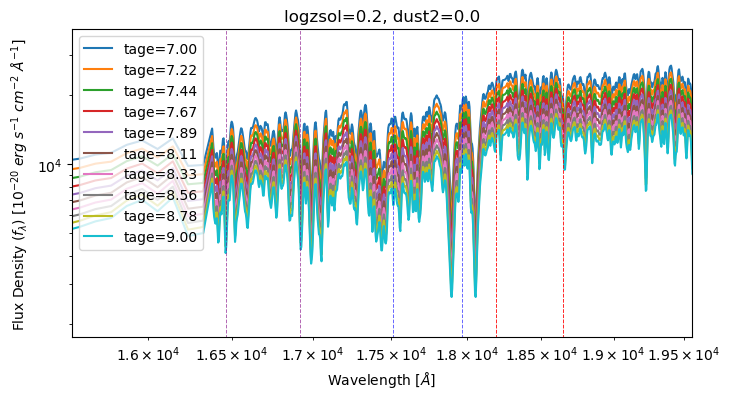

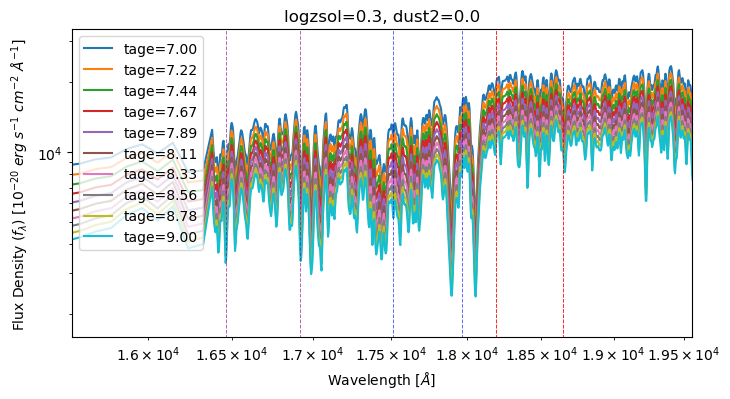

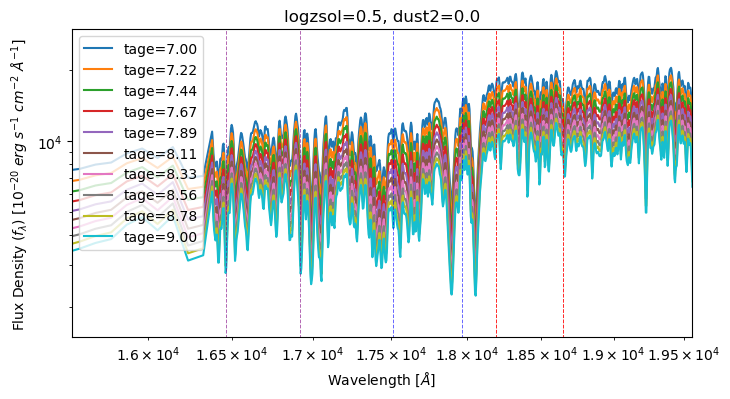

In [15]:
i_dust = 0

for i_logz in range(len(logzs)):

    minis = []
    maxis = []
    
    figure(figsize=(8,4))
    
    for i_tage in range(len(tages)):
    
        loglog(wspec, data_grid_spec[i_logz,i_dust,i_tage,:], lw=1.5, label=f'tage={tages[i_tage]:.2f}')
        maxis.append(data_grid_spec[i_logz,i_dust,i_tage,382:914].max())
        minis.append(data_grid_spec[i_logz,i_dust,i_tage,382:914].min())
    
    plotBalmerBreakD4000(**run_params)
    plotBalmerBreak(**run_params)

    maxis = np.array(maxis)
    minis = np.array(minis)
    
    xmin, xmax = (3620-200)*a, (4100+200)*a
    ymin, ymax = minis.min()/1.5, maxis.max()*1.5
    
    xlim([xmin,xmax])
    ylim([ymin,ymax])
    
    xlabel(r'Wavelength [$\AA$]')
    ylabel(r'Flux Density ($f_\lambda$) [$10^{-20}$ $erg$ $s^{-1}$ $cm^{-2}$ $\AA^{-1}$]')
    legend()
    
    title_text = f'logzsol={logzs[i_logz]:.1f}, dust2={dusts[i_dust]:.1f}'
    title(title_text)
    
    show()

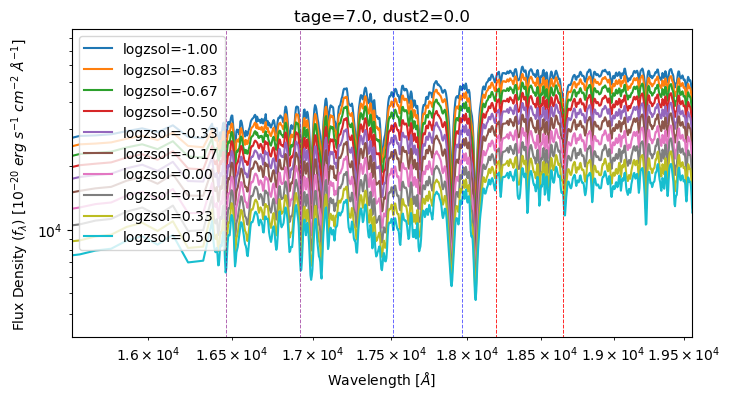

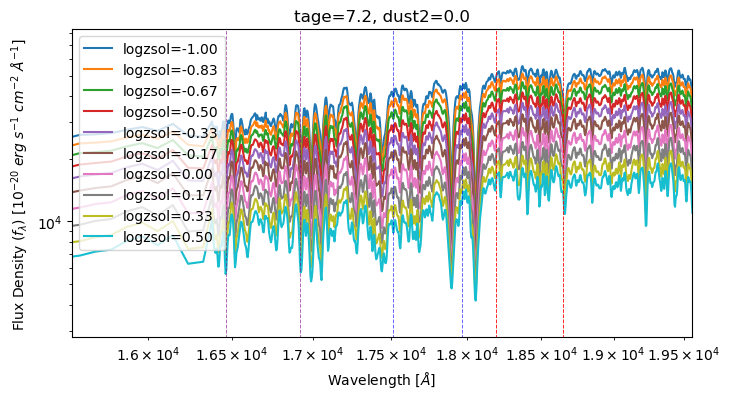

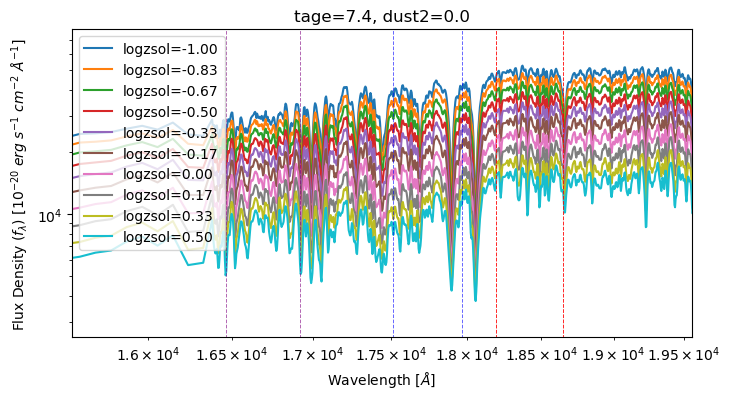

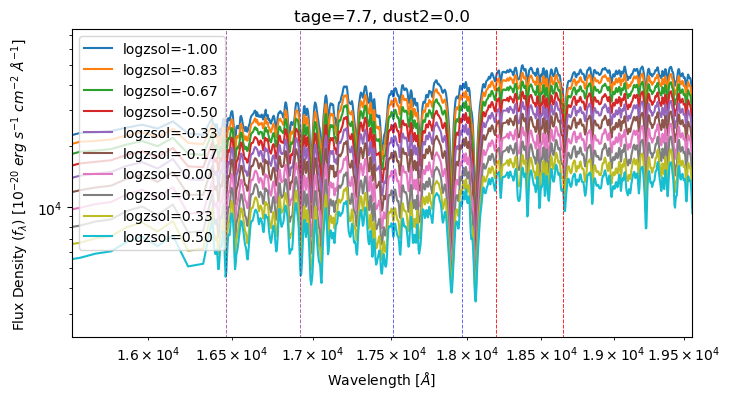

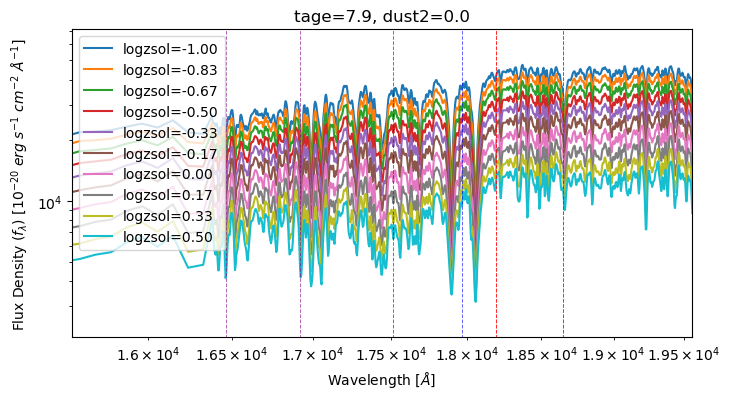

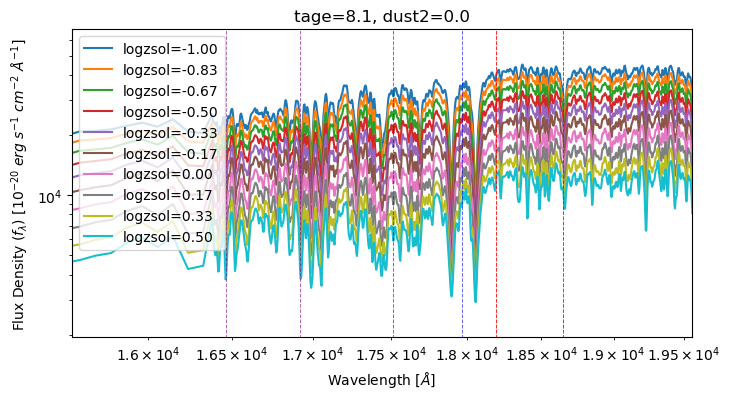

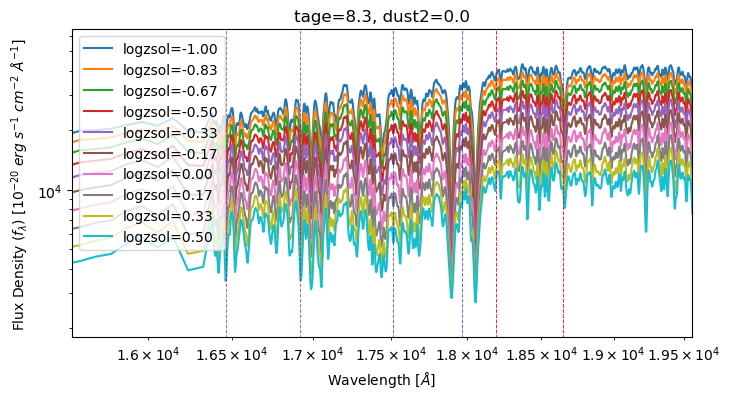

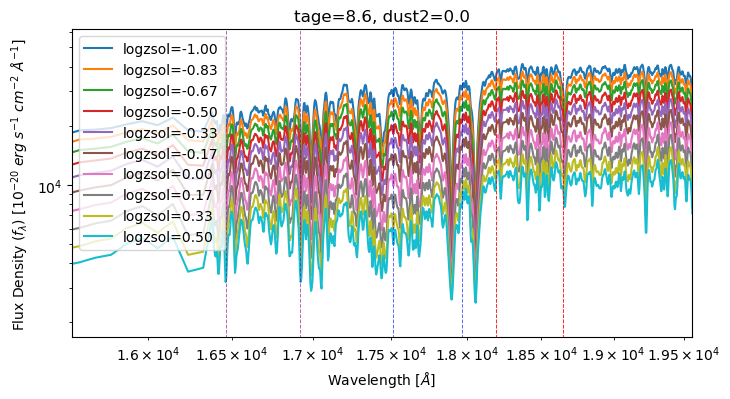

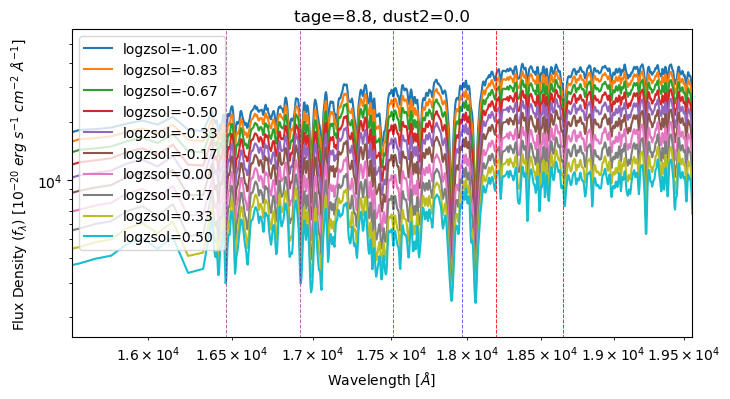

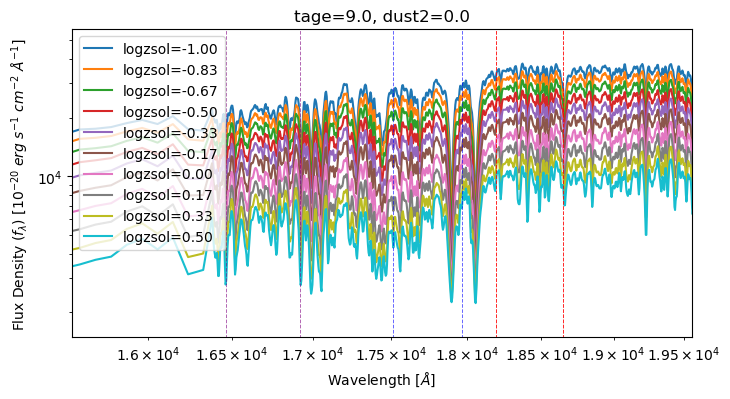

In [13]:
i_dust = 0

for i_tage in range(len(tages)):

    maxis = []
    minis = []
    
    figure(figsize=(8,4))
    
    for i_logz in range(len(logzs)):
    
        loglog(wspec, data_grid_spec[i_logz,i_dust,i_tage,:], lw=1.5, label=f'logzsol={logzs[i_logz]:.2f}')
        maxis.append(data_grid_spec[i_logz,i_dust,i_tage,382:914].max())
        minis.append(data_grid_spec[i_logz,i_dust,i_tage,382:914].min())
    
    plotBalmerBreakD4000(**run_params)
    plotBalmerBreak(**run_params)

    maxis = np.array(maxis)
    minis = np.array(minis)
    
    xmin, xmax = (3620-200)*a, (4100+200)*a
    ymin, ymax = minis.min()/1.5, maxis.max()*1.5
    
    xlim([xmin,xmax])
    ylim([ymin,ymax])
    
    xlabel(r'Wavelength [$\AA$]')
    ylabel(r'Flux Density ($f_\lambda$) [$10^{-20}$ $erg$ $s^{-1}$ $cm^{-2}$ $\AA^{-1}$]')
    legend()
    
    title_text = f'tage={tages[i_tage]:.1f}, dust2={dusts[i_dust]:.1f}'
    title(title_text)
    
    show()

# Plotting images to compare strength of the break for two methods

-----------------

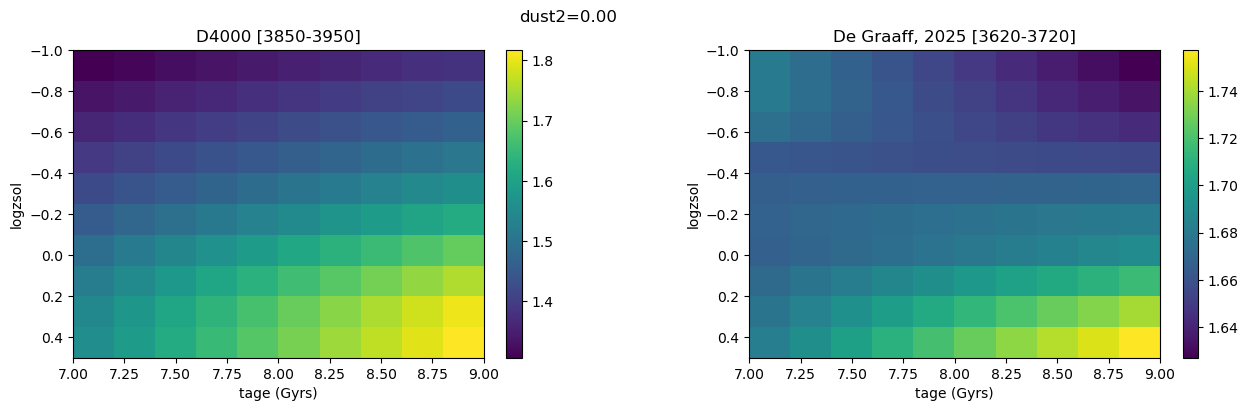

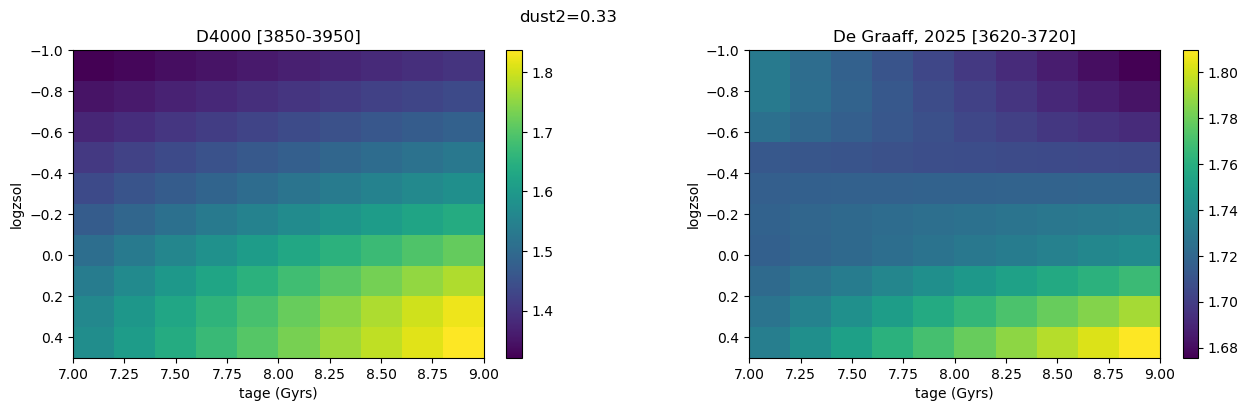

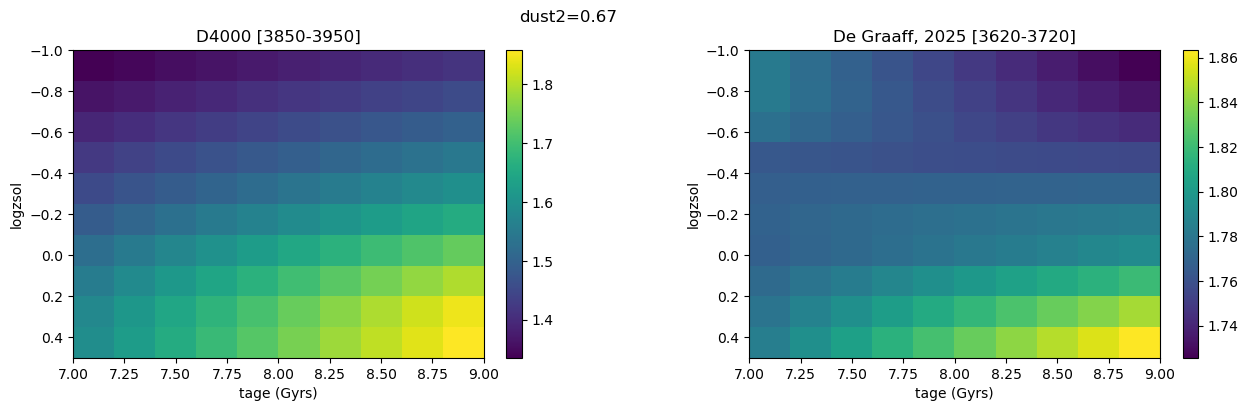

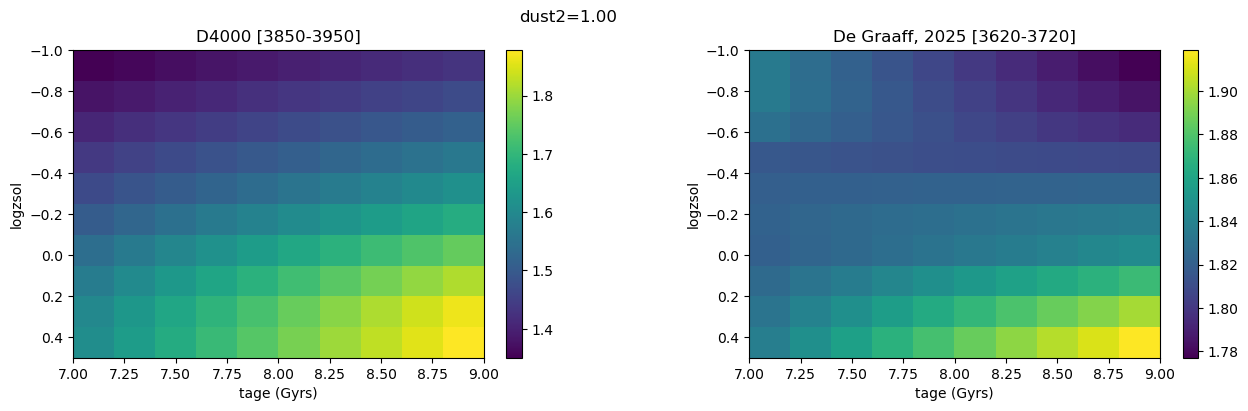

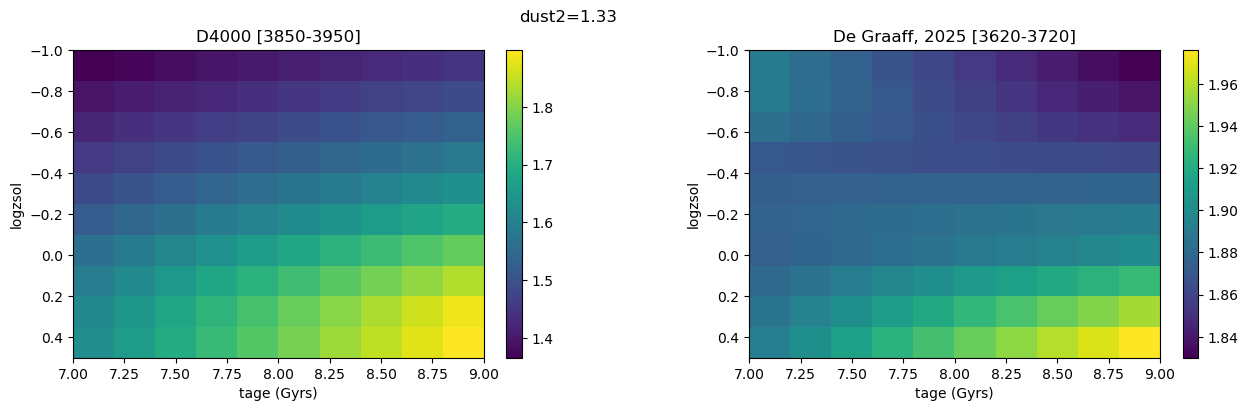

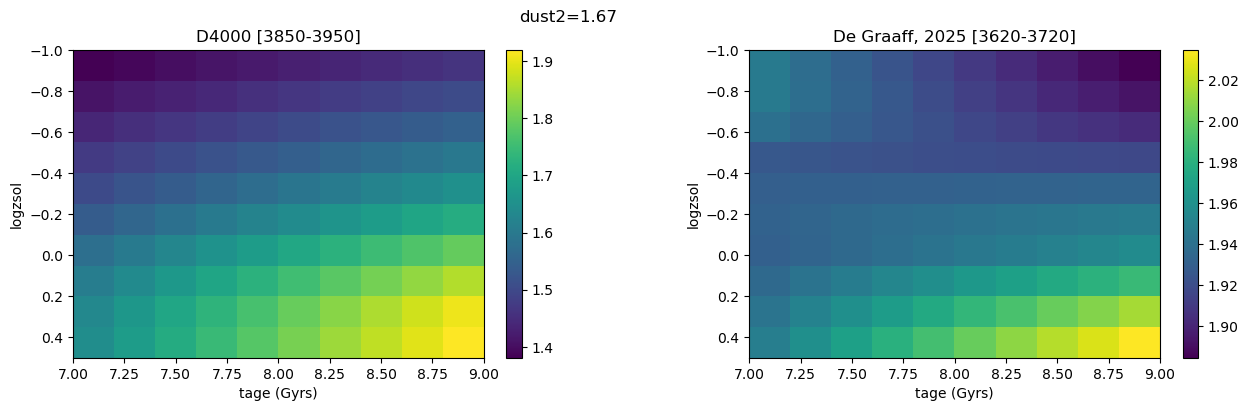

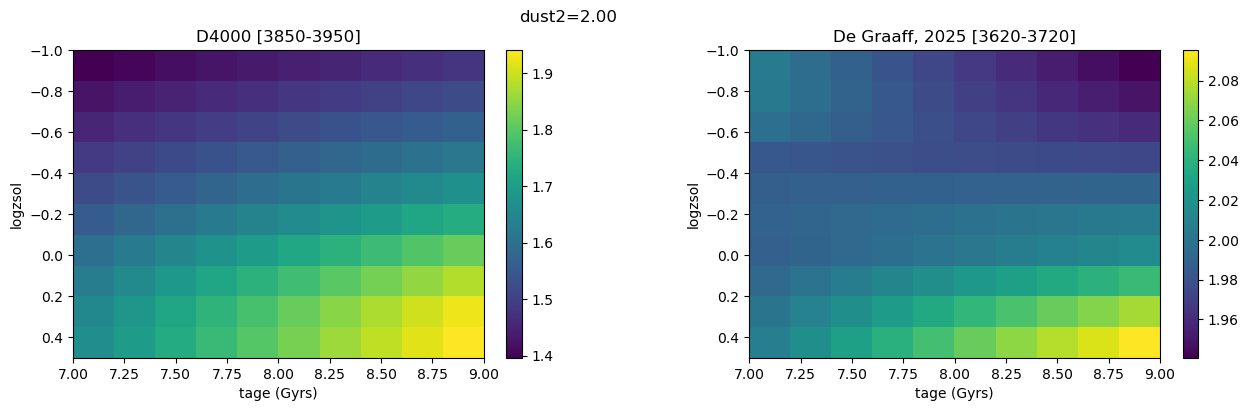

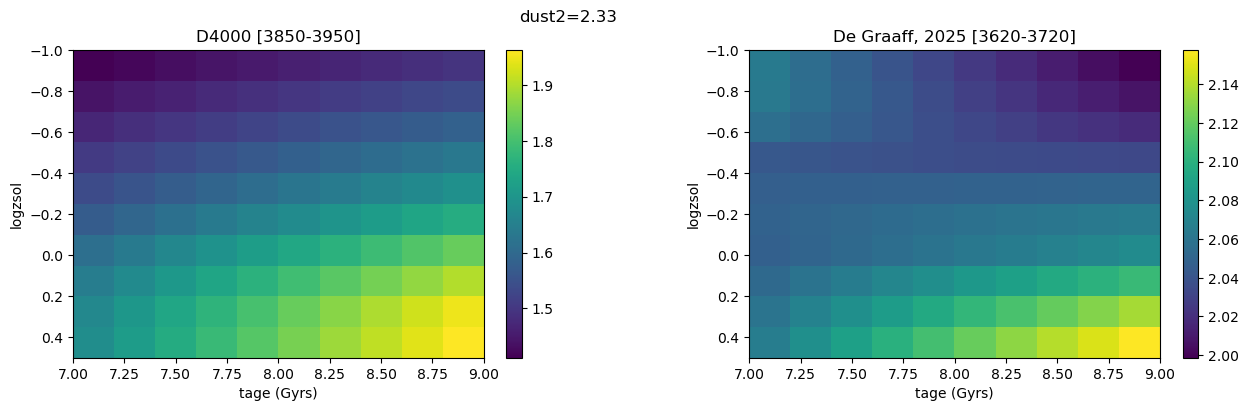

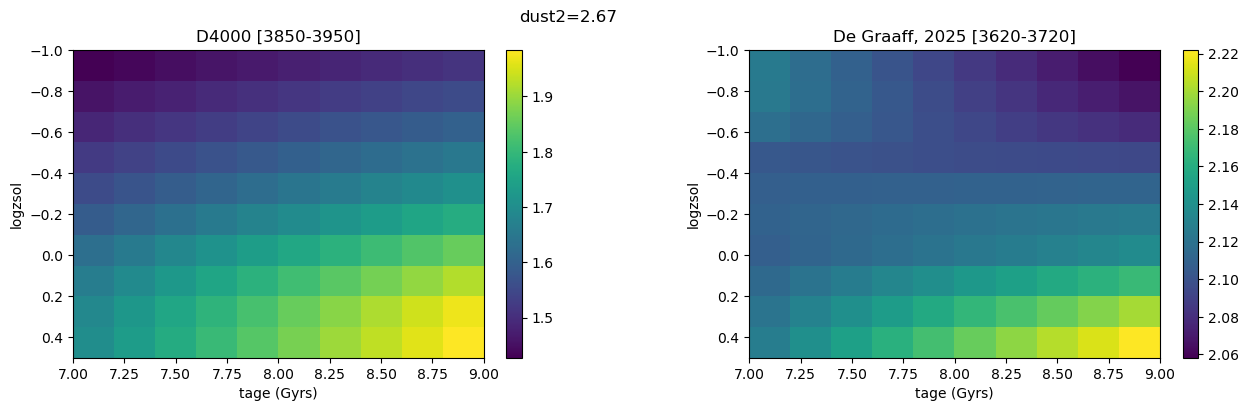

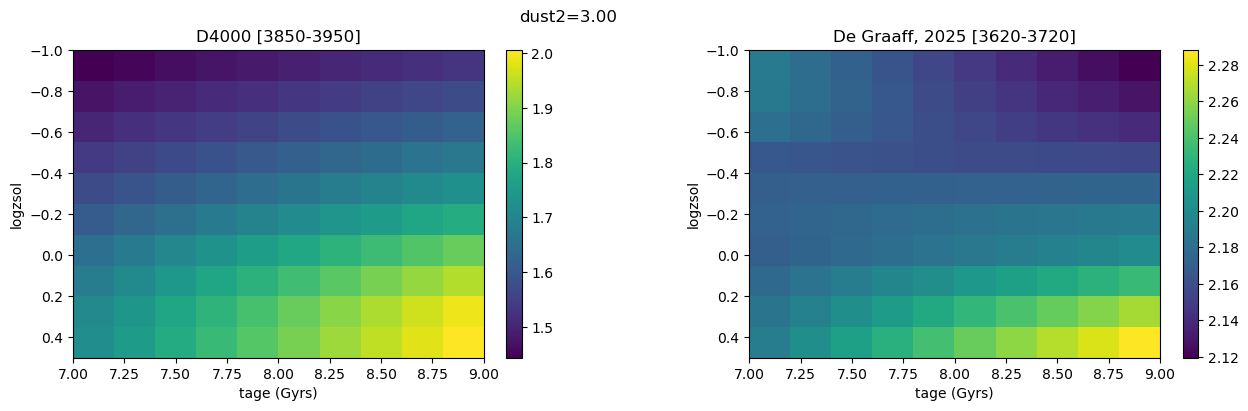

In [18]:
for i_dust in range(len(dusts)):
    
    fig, [ax1, ax2] = subplots(1,2, figsize=(16,4))
    
    test = data_grid_break_D4000[:,i_dust,:,:]
    im1 = ax1.imshow(test, extent=[tages[0], tages[-1], logzs[-1], logzs[0]])
    fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
    ax1.set_xlabel('tage (Gyrs)')
    ax1.set_ylabel('logzsol')
    
    test = data_grid_break[:,i_dust,:,:]
    im2 = ax2.imshow(test, extent=[tages[0], tages[-1], logzs[-1], logzs[0]])
    fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
    ax2.set_xlabel('tage (Gyrs)')
    ax2.set_ylabel('logzsol')
    
    ax1.set_title('D4000 [3850-3950]')
    ax2.set_title('De Graaff, 2025 [3620-3720]')
    
    fig.suptitle(f'dust2={dusts[i_dust]:.2f}')
    
    show()

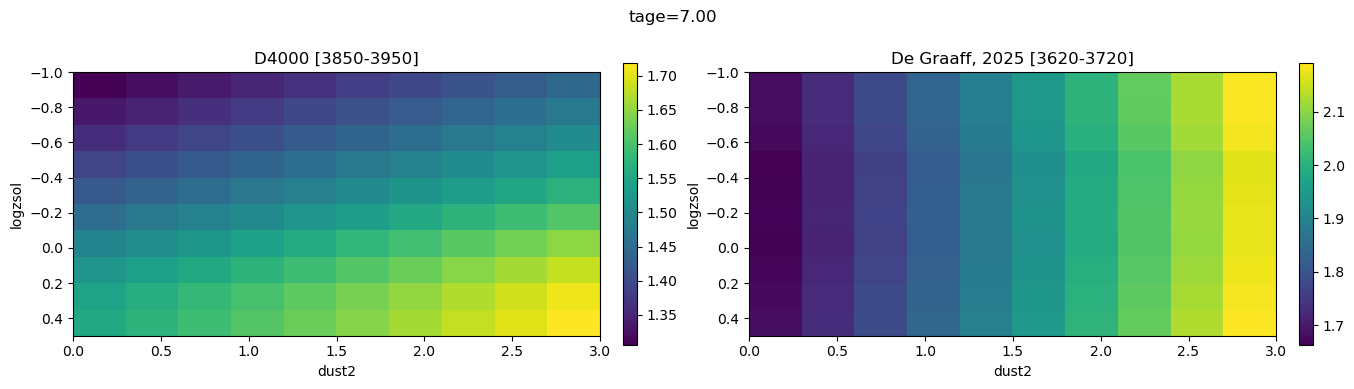

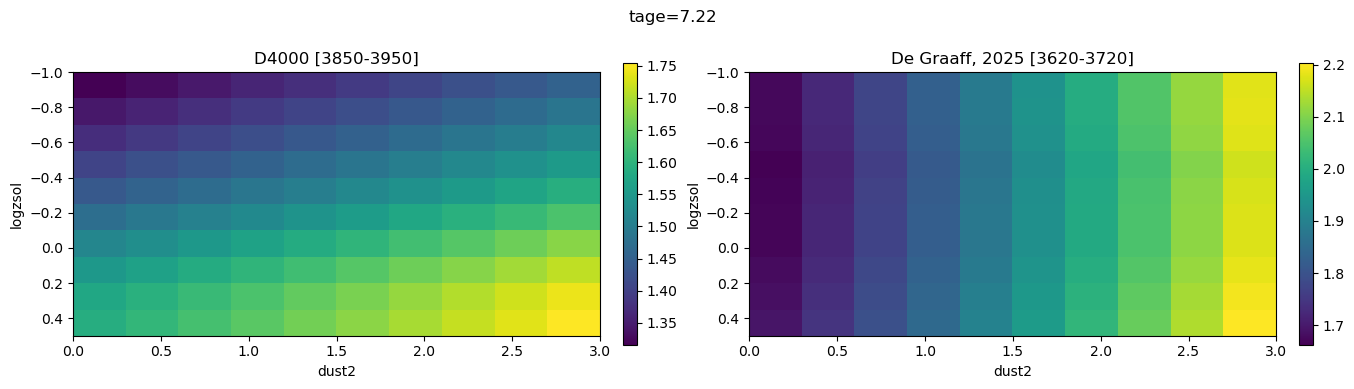

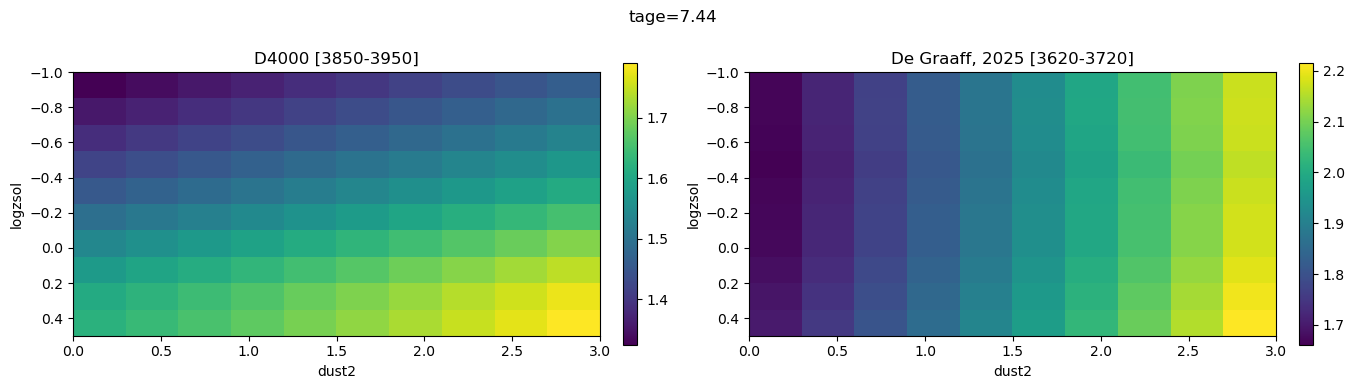

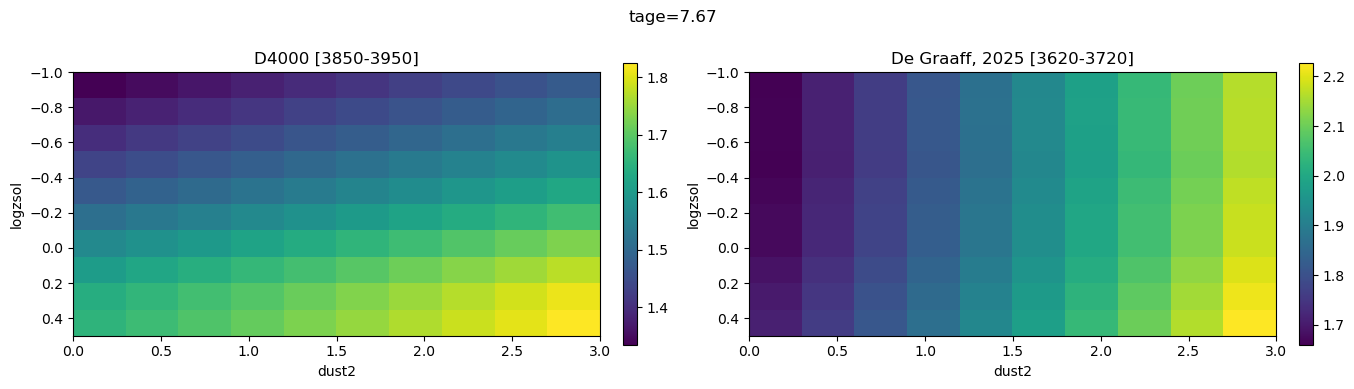

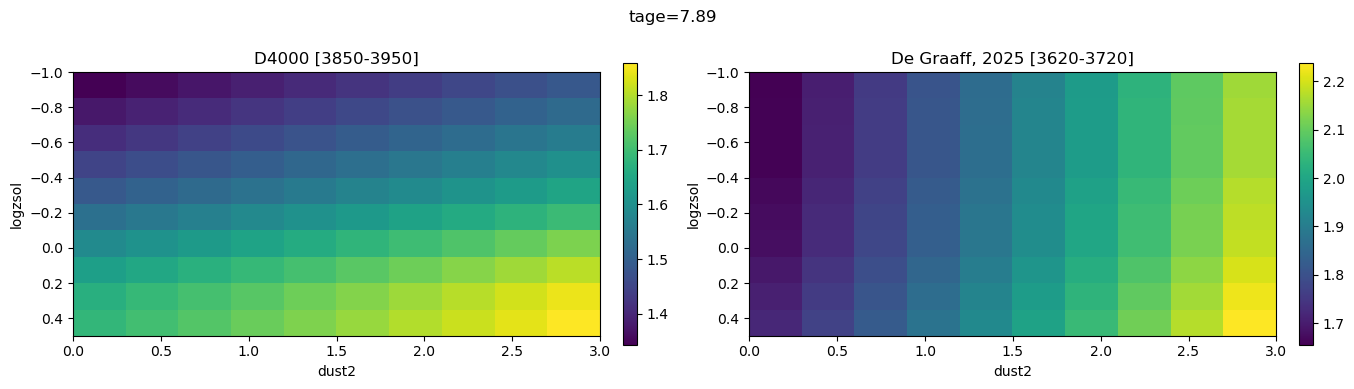

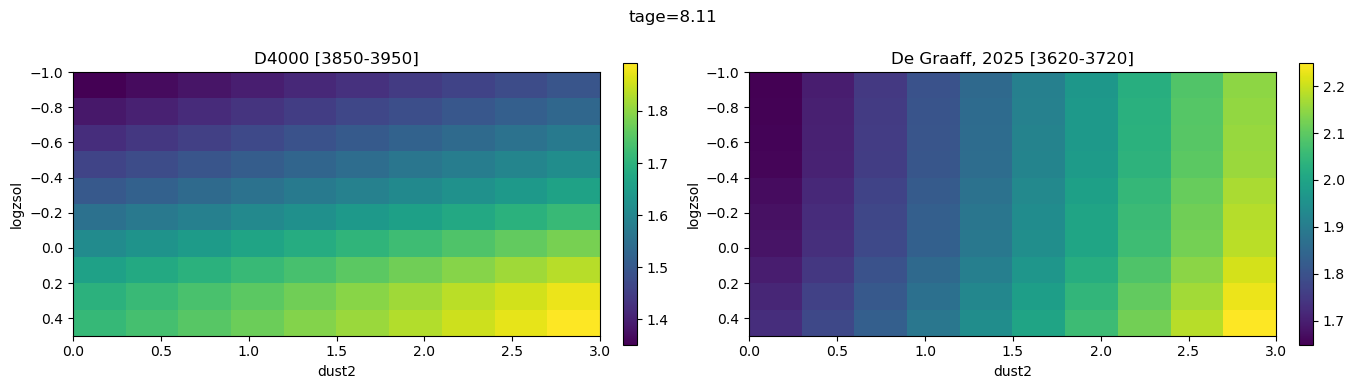

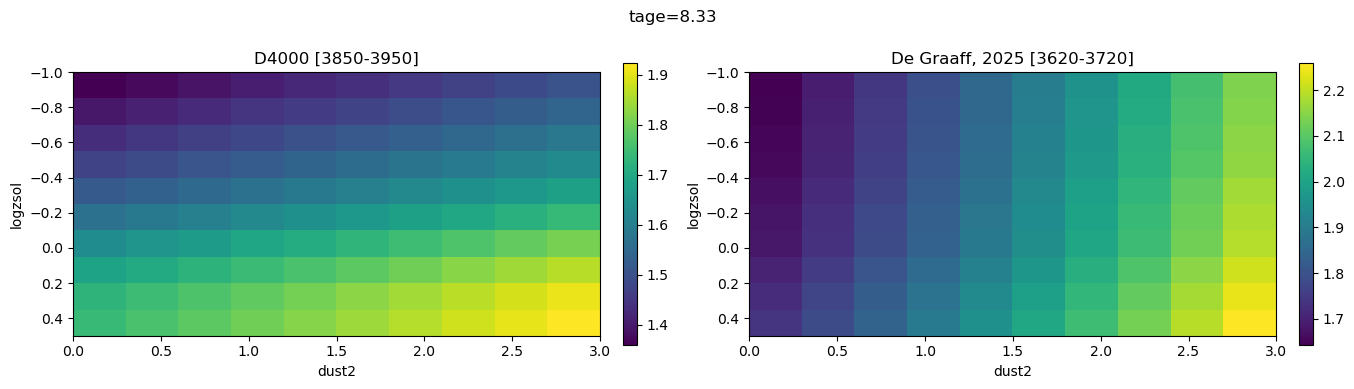

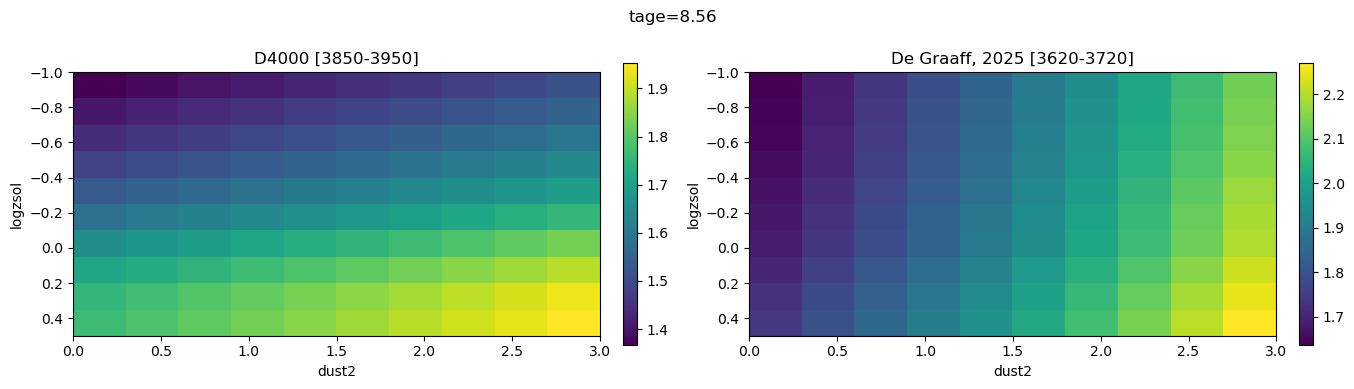

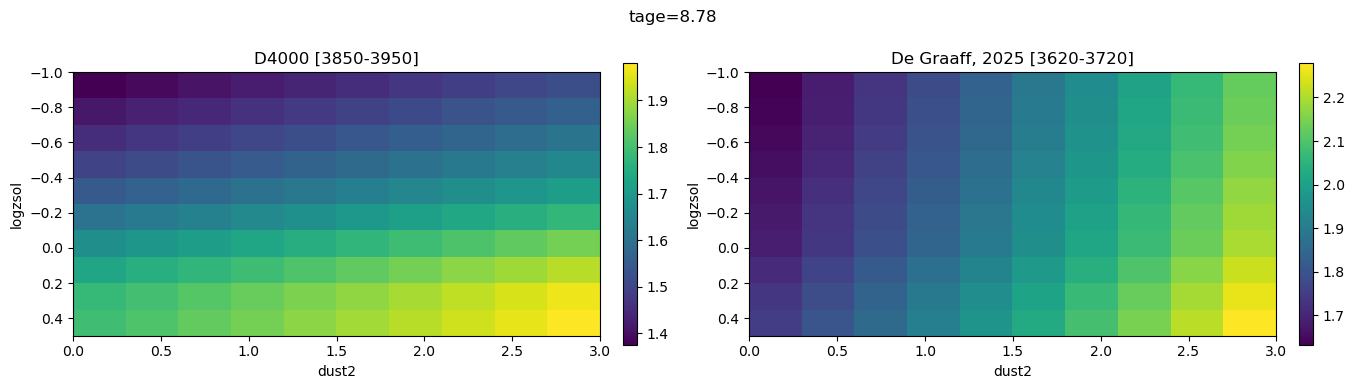

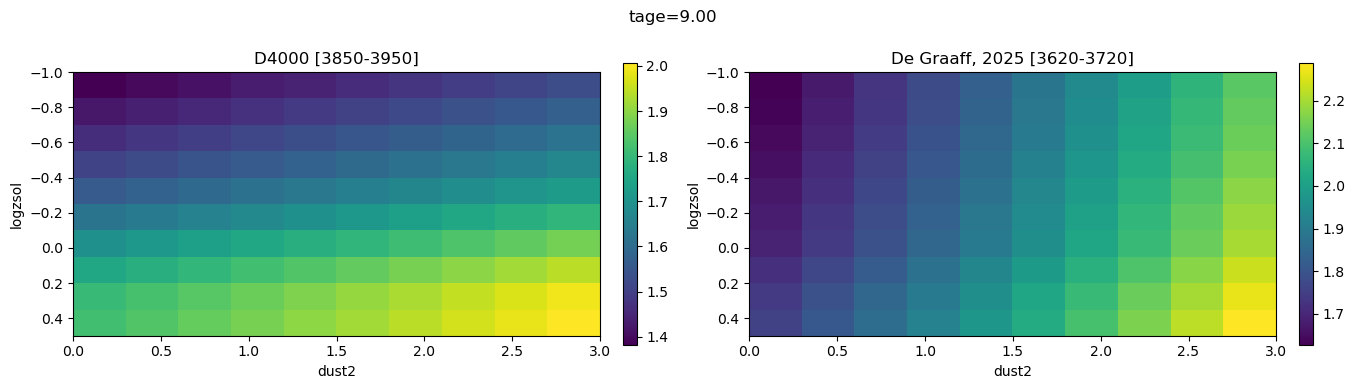

In [19]:
for i_tage in range(len(tages)):
    
    fig, [ax1, ax2] = subplots(1,2, figsize=(16,4))
    
    test = data_grid_break_D4000[:,:,i_tage,:]
    im1 = ax1.imshow(test, extent=[dusts[0], dusts[-1], logzs[-1], logzs[0]])
    fig.colorbar(im1, ax=ax1, fraction=0.025, pad=0.04)
    ax1.set_xlabel('dust2')
    ax1.set_ylabel('logzsol')
    
    test = data_grid_break[:,:,i_tage,:]
    im2 = ax2.imshow(test, extent=[dusts[0], dusts[-1], logzs[-1], logzs[0]])
    fig.colorbar(im2, ax=ax2, fraction=0.025, pad=0.04)
    ax2.set_xlabel('dust2')
    ax2.set_ylabel('logzsol')
    
    ax1.set_title('D4000 [3850-3950]')
    ax2.set_title('De Graaff, 2025 [3620-3720]')
    
    fig.suptitle(f'tage={tages[i_tage]:.2f}')
    
    show()

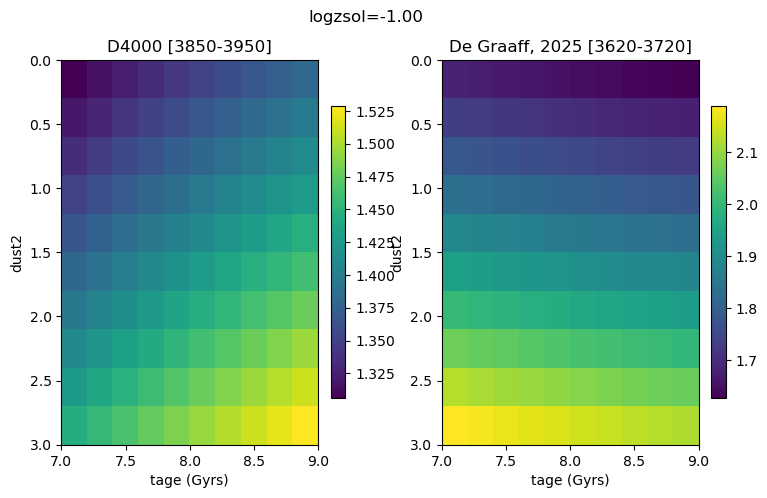

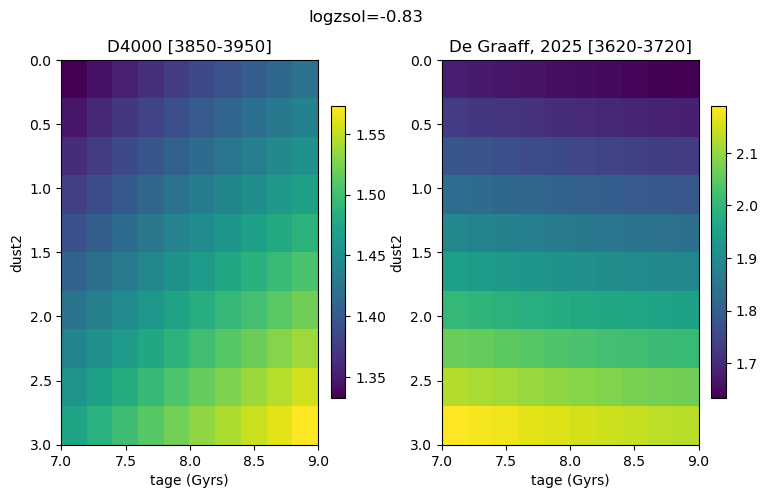

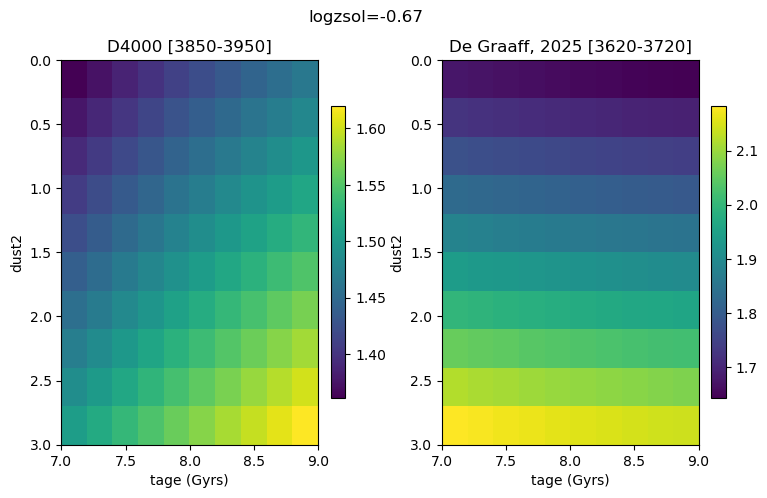

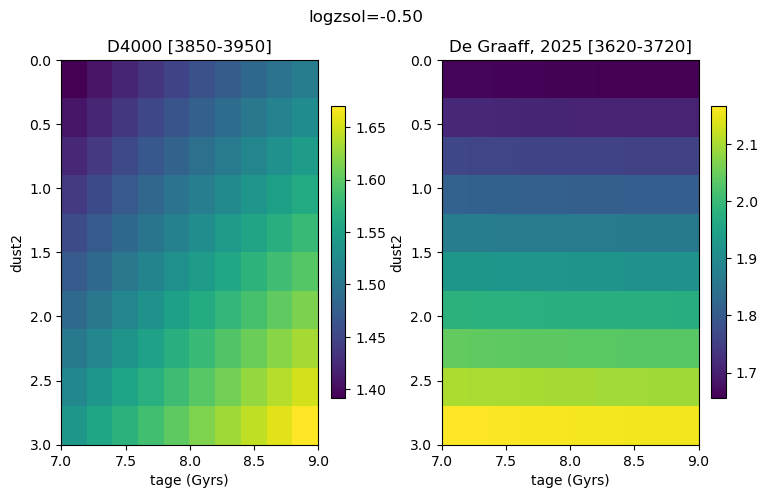

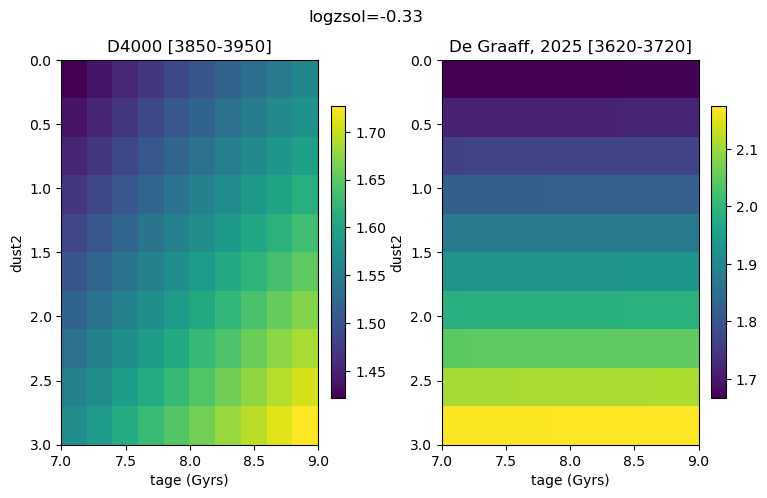

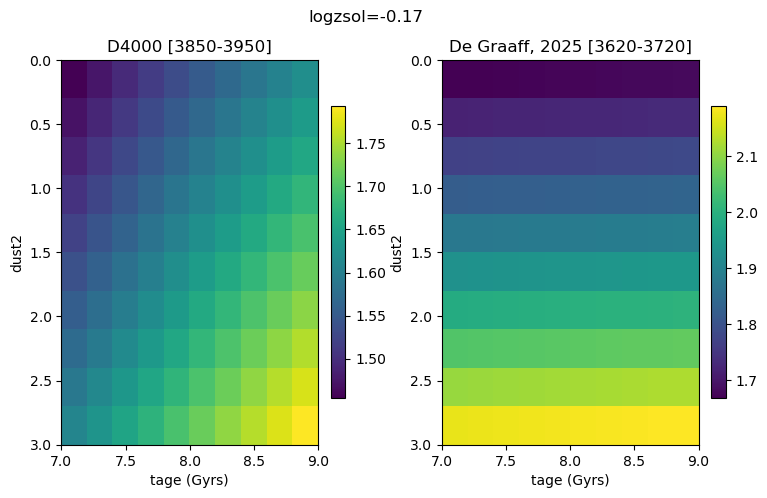

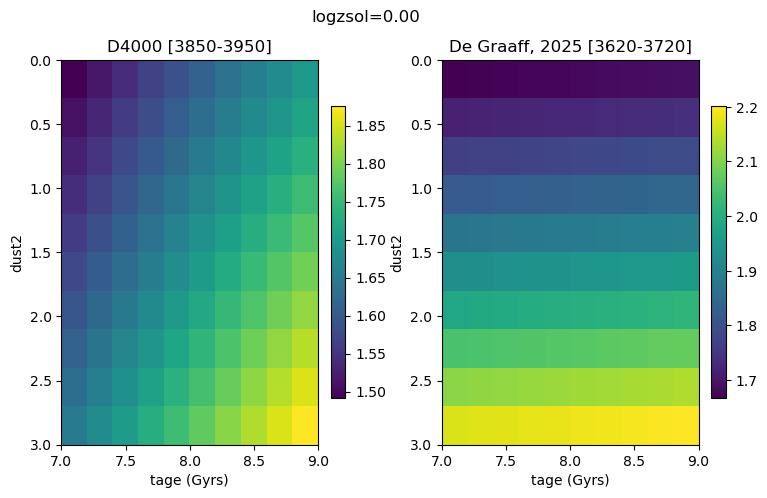

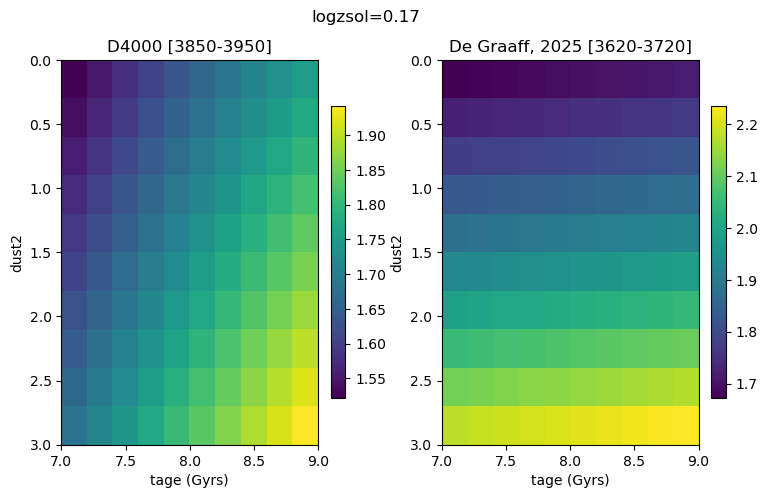

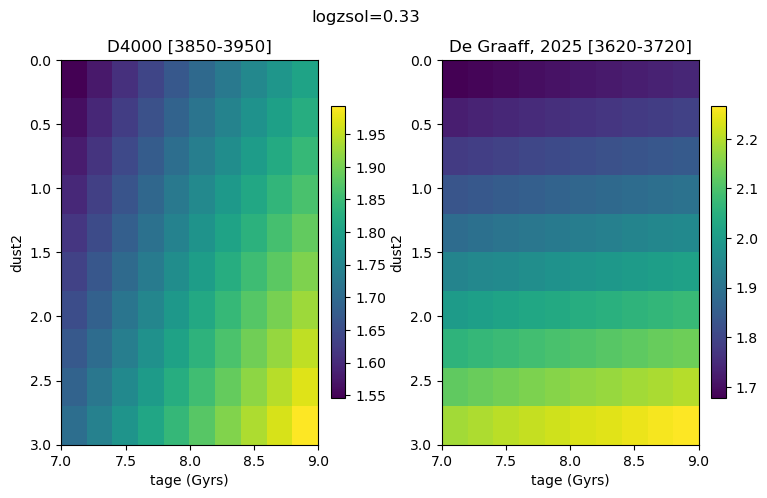

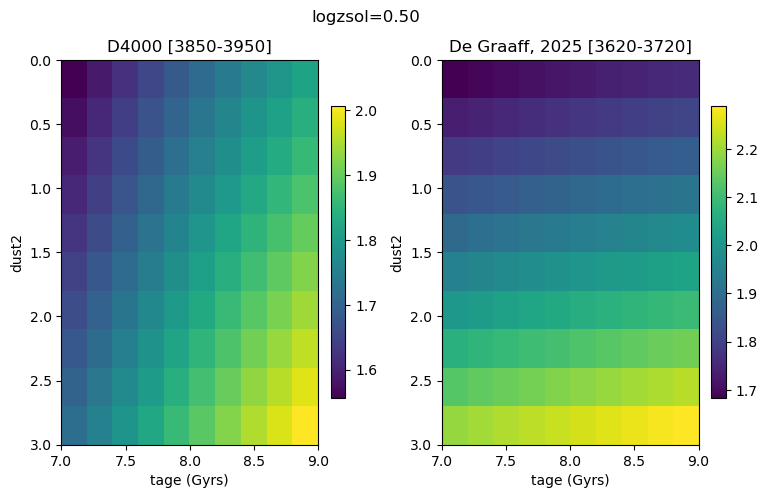

In [20]:
for i_logz in range(len(logzs)):
    
    fig, [ax1, ax2] = subplots(1,2, figsize=(9,5))
    
    test = data_grid_break_D4000[i_logz,:,:,:]
    im1 = ax1.imshow(test, extent=[tages[0], tages[-1], dusts[-1], dusts[0]])
    fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
    ax1.set_xlabel('tage (Gyrs)')
    ax1.set_ylabel('dust2')
    
    test = data_grid_break[i_logz,:,:,:]
    im2 = ax2.imshow(test, extent=[tages[0], tages[-1], dusts[-1], dusts[0]])
    fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
    ax2.set_xlabel('tage (Gyrs)')
    ax2.set_ylabel('dust2')
    
    ax1.set_title('D4000 [3850-3950]')
    ax2.set_title('De Graaff, 2025 [3620-3720]')
    
    fig.suptitle(f'logzsol={logzs[i_logz]:.2f}')
    
    show()